In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
from scipy import stats

In [5]:
df = pd.read_csv ("../Data/Control.csv")
df

,Time C2,Pressure C2,Volume C2
0,3.283333,3.32964,17.9672
1,3.300000,3.41033,18.2881
2,3.316667,3.52450,18.6115
3,3.333333,3.56523,18.9507
4,3.350000,3.59318,19.2876
...,...,...,...
6242,107.316667,3.35765,17.3716
6243,107.333333,4.81141,16.6621
6244,107.350000,4.13365,16.8809
6245,107.366667,3.67052,17.1117


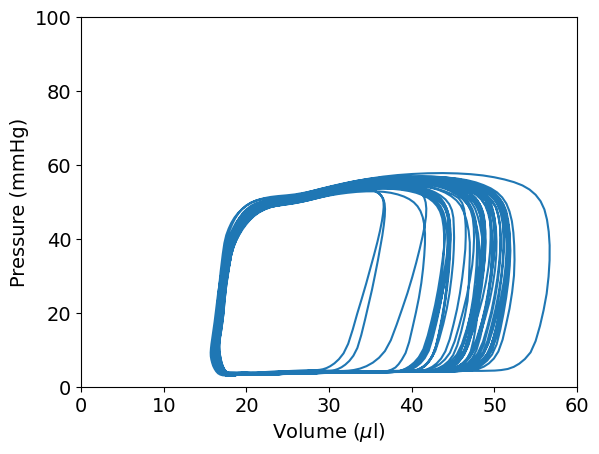

In [6]:
plt.plot(df[" Volume C2"], df["Pressure C2"])
plt.axis([0, 60, 0, 100])
plt.xlabel("Volume ($\mu$l)")
plt.ylabel("Pressure (mmHg)")
plt.savefig("../Manuscript/PVLoops_A.pdf")

In [7]:
df = pd.read_csv ("../Data/HFrEF.csv")
df

,Time A1,Pressure A1,Volume A1
0,44.350000,3.53255,25.1011
1,44.366667,3.53574,25.7679
2,44.383333,3.54498,26.4586
3,44.400000,3.56011,27.1334
4,44.416667,3.58880,27.6706
...,...,...,...
1048570,0.000000,NaN,NaN
1048571,0.000000,NaN,NaN
1048572,0.000000,NaN,NaN
1048573,0.000000,NaN,NaN


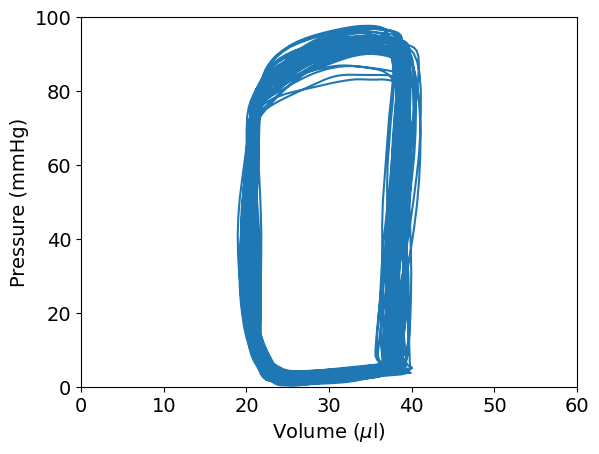

In [8]:
plt.plot(df["Volume A1"], df["Pressure A1"])
plt.axis([0, 60, 0, 100])
plt.xlabel("Volume ($\mu$l)")
plt.ylabel("Pressure (mmHg)")
plt.savefig("../Manuscript/PVLoops_B.pdf")

In [12]:
df = pd.read_csv ("../Data/Periods.csv")
df

,T_C1,T_C2,T_C3,T_C4,T_C5,T_C6,T_C7,T_C8,T_C9,T_C10,...,T_A1,T_A2,T_A3,T_A4,T_A5,T_A6,T_A7,T_A8,T_A9,T_A10
0,1.933333,2.216667,1.816667,1.800000,2.166667,2.183333,2.383333,2.150000,2.25,2.233333,...,1.950000,2.116667,2.100000,1.883333,2.200000,1.966667,2.416667,2.033333,2.233333,1.916667
1,1.916667,2.200000,1.833333,1.800000,2.166667,2.200000,2.316667,2.150000,2.25,2.216667,...,1.950000,2.100000,2.100000,1.850000,2.216667,1.966667,2.416667,2.050000,2.233333,1.900000
2,1.933333,2.216667,1.833333,1.800000,2.166667,2.150000,2.350000,2.133333,2.25,2.233333,...,1.933333,2.116667,2.100000,1.883333,2.200000,1.950000,2.416667,2.050000,2.083333,1.916667
3,1.933333,2.216667,1.833333,1.800000,2.166667,2.133333,2.350000,2.116667,2.25,2.233333,...,1.933333,2.100000,2.066667,1.866667,2.216667,1.966667,2.383333,2.033333,2.366667,1.916667
4,1.916667,2.200000,1.833333,1.800000,2.166667,2.150000,2.383333,2.116667,2.25,2.233333,...,1.933333,2.083333,2.100000,1.883333,2.133333,1.950000,2.416667,2.050000,2.266667,1.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,NaN,NaN,1.833333,1.800000,2.183333,2.216667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.183333,1.966667,2.400000,2.033333,2.233333,NaN
68,NaN,NaN,1.816667,1.800000,2.166667,2.200000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.216667,1.966667,2.383333,2.066667,2.233333,NaN
69,NaN,NaN,1.850000,1.800000,2.183333,2.116667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.200000,1.966667,2.416667,NaN,2.233333,NaN
70,NaN,NaN,1.816667,1.800000,2.183333,2.216667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.183333,1.950000,2.400000,NaN,2.233333,NaN


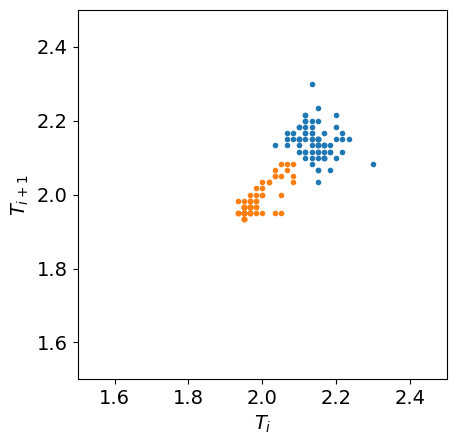

In [14]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.plot(df["T_C6"].dropna()[1:], df["T_C6"].dropna()[:-1],'.')
ax.plot(df["T_A6"].dropna()[1:], df["T_A6"].dropna()[:-1],'.')
ax.set_xlim([1.5, 2.5])
ax.set_ylim([1.5, 2.5])
ax.set_xlabel(r"$T_i$")
ax.set_ylabel(r"$T_{i+1}$")

plt.savefig("../Manuscript/Fig02_A.pdf")

In [15]:
def Noise(u):
    x = np.array(u.dropna())
    C1 = - x[:-1]/np.sqrt(2) + x[1:]/np.sqrt(2)
    SD1 = np.std(C1)
    C2 = x[:-1]/np.sqrt(2) + x[1:]/np.sqrt(2)
    SD2 = np.std(C2)
    return SD1, SD2

def Mean(u):
    x = np.array(u.dropna())
    return np.mean(x)

In [16]:
controls = ("T_C1", "T_C2", "T_C3", "T_C4", "T_C5", "T_C6", "T_C7", "T_C8", "T_C9", "T_C10", "T_C11", "T_C12", "T_C13", "T_C14")

N_C = len(controls)
Means_C = np.zeros(N_C)

for i in range(N_C):
    Means_C[i] = Mean(df[controls[i]])
    

experiments = ("T_A1", "T_A2", "T_A3", "T_A4", "T_A5", "T_A6", "T_A7", "T_A8", "T_A9", "T_A10")

N_E = len(experiments)
Means_E = np.zeros(N_E)

for i in range(N_E):
    Means_E[i] = Mean(df[experiments[i]])


In [17]:
means = np.array([np.mean(Means_C), np.mean(Means_E)])
cvs = np.array([np.std(Means_C)/np.sqrt(N_C), np.std(Means_E)/np.sqrt(N_E)]) 

means, cvs

(array([2.09454995, 2.07914004]), array([0.04894704, 0.049542  ]))

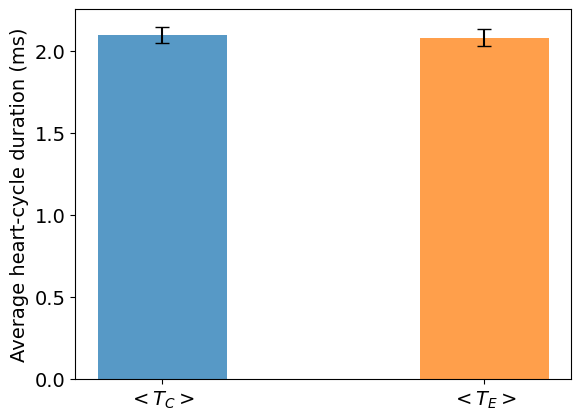

In [18]:
fig, ax = plt.subplots()
ax.bar(["$<T_C>$", "$<T_E>$"], means, width=0.4, yerr=cvs, align='center', alpha=0.75, color=("C0", "C1"), ecolor='black', capsize=5)
ax.set_ylabel('Average heart-cycle duration (ms)')
props = {'connectionstyle':'bar','arrowstyle':'-', 'shrinkA':20,'shrinkB':20,'linewidth':2}

plt.savefig("../Manuscript/Fig01_A.pdf")

In [19]:
controls = ("T_C1", "T_C2", "T_C3", "T_C4", "T_C5", "T_C6", "T_C7", "T_C8", "T_C9", "T_C10", "T_C11", "T_C12", "T_C13", "T_C14")

N_C = len(controls)
SD1_C = np.zeros(N_C)
SD2_C = np.zeros(N_C)

for i in range(N_C):
    SD1_C[i], SD2_C[i] = Noise(df[controls[i]]*1e3) 
    

experiments = ("T_A1", "T_A2", "T_A3", "T_A4", "T_A5", "T_A6", "T_A7", "T_A8", "T_A9", "T_A10")

N_E = len(experiments)
SD1_E = np.zeros(N_E)
SD2_E = np.zeros(N_E)

for i in range(N_E):
    SD1_E[i], SD2_E[i] = Noise(df[experiments[i]]*1e3) 


In [20]:
means = np.array([np.mean(SD1_C), np.mean(SD1_E), np.mean(SD2_C), np.mean(SD2_E)])
cvs = np.array([np.std(SD1_C)/np.sqrt(N_C), np.std(SD1_E)/np.sqrt(N_E), np.std(SD2_C)/np.sqrt(N_C), np.std(SD2_E)/np.sqrt(N_E)]) 

means, cvs

(array([21.28938782, 26.63546453, 18.49969975, 23.66707071]),
 array([4.99776609, 8.18477715, 5.17551307, 5.59777047]))

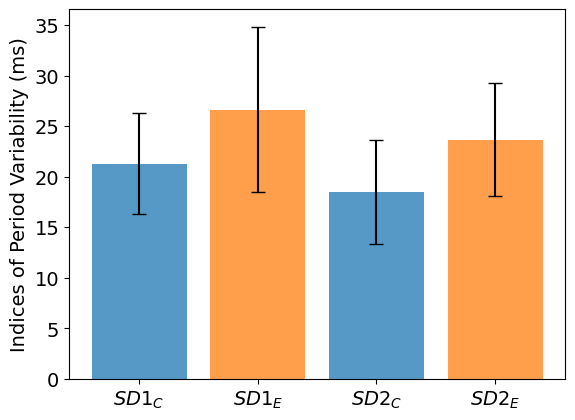

In [21]:
fig, ax = plt.subplots()
ax.bar(["$SD1_C$", "$SD1_E$", "$SD2_C$", "$SD2_E$"], means, yerr=cvs, align='center', alpha=0.75, color=("C0", "C1", "C0", "C1"), ecolor='black', capsize=5)
ax.set_ylabel('Indices of Period Variability (ms)')

plt.savefig("../Manuscript/Fig02_C.pdf")

In [22]:
t_stat, p_value = stats.ttest_ind(SD1_C, SD1_E, equal_var=False)
p_value/2

0.3014949442639213

In [23]:
t_stat, p_value = stats.ttest_ind(SD2_C, SD2_E, equal_var=False)
p_value/2

0.2622242039724114

In [24]:
df = pd.read_csv ("../Data/Volumes.csv")
df

,SV_C1,SV_C2,SV_C3,SV_C4,SV_C5,SV_C6,SV_C7,SV_C8,SV_C9,SV_C10,...,SV_A1,SV_A2,SV_A3,SV_A4,SV_A5,SV_A6,SV_A7,SV_A8,SV_A9,SV_A10
0,22.465,24.729,24.266,27.611,20.631,17.086,17.170,12.767,28.667,27.237,...,17.716,15.327,10.864,13.776,10.851,5.607,1.891,18.158,18.580,7.874
1,24.170,23.711,22.824,24.537,21.912,17.031,18.483,18.032,33.434,28.286,...,17.646,11.703,10.998,13.400,11.194,6.096,2.333,18.104,18.427,11.698
2,23.869,19.292,24.436,22.639,21.066,16.648,20.635,19.200,31.021,29.893,...,17.021,11.122,10.344,13.172,11.558,5.068,2.642,17.263,18.685,9.465
3,22.044,27.727,27.769,23.727,21.701,18.781,18.050,14.873,29.819,29.444,...,15.787,10.239,7.968,13.581,10.716,5.726,2.561,15.967,14.321,12.643
4,22.703,26.480,26.977,24.986,20.386,16.011,20.064,13.174,28.448,29.228,...,17.645,10.924,9.568,14.063,11.018,5.625,3.220,18.493,21.134,8.981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.819,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.454,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.204,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.144,NaN


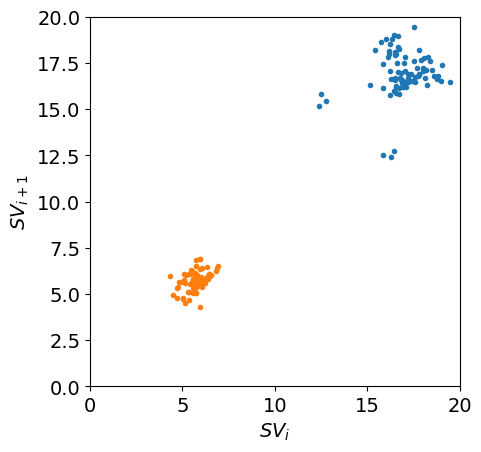

In [25]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.plot(df["SV_C6"].dropna()[1:], df["SV_C6"].dropna()[:-1],'.')
ax.plot(df["SV_A6"].dropna()[1:], df["SV_A6"].dropna()[:-1],'.')
ax.set_xlim([0, 20])
ax.set_ylim([0, 20])
ax.set_xlabel(r"$SV_i$")
ax.set_ylabel(r"$SV_{i+1}$")

plt.savefig("../Manuscript/Fig02_B.pdf")

In [26]:
controls = ("SV_C1", "SV_C2", "SV_C3", "SV_C4", "SV_C5", "SV_C6", "SV_C7", "SV_C8", "SV_C9", "SV_C10", "SV_C11", "SV_C12", "SV_C13", "SV_C14")

N_C = len(controls)
Means_C = np.zeros(N_C)

for i in range(N_C):
    Means_C[i] = Mean(df[controls[i]])
    

experiments = ("SV_A1", "SV_A2", "SV_A3", "SV_A4", "SV_A5", "SV_A6", "SV_A7", "SV_A8", "SV_A9", "SV_A10")

N_E = len(experiments)
Means_E = np.zeros(N_E)

for i in range(N_E):
    Means_E[i] = Mean(df[experiments[i]])


In [27]:
means = np.array([np.mean(Means_C), np.mean(Means_E)])
cvs = np.array([np.std(Means_C)/np.sqrt(N_C), np.std(Means_E)/np.sqrt(N_E)]) 

means, cvs

(array([24.58029894, 11.89297269]), array([1.65719702, 1.4309399 ]))

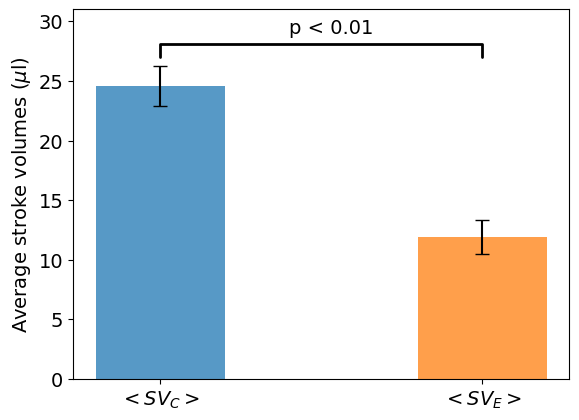

In [28]:
fig, ax = plt.subplots()
ax.bar(["$<SV_C>$", "$<SV_E>$"], means, width=0.4, yerr=cvs, align='center', alpha=0.75, color=("C0", "C1"), ecolor='black', capsize=5)
ax.set_ylabel('Average stroke volumes ($\mu$l)')
props = {'connectionstyle':'bar','arrowstyle':'-', 'shrinkA':60,'shrinkB':60,'linewidth':2}
ax.annotate("p < 0.01", xy=(.4, 29), zorder=10)
ax.annotate('', xy=(0,20), xytext=(1,20), arrowprops=props)
ax.set_ylim([0,31])

plt.savefig("../Manuscript/Fig01_B.pdf")

In [29]:
controls = ("SV_C1", "SV_C2", "SV_C3", "SV_C4", "SV_C5", "SV_C6", "SV_C7", "SV_C8", "SV_C9", "SV_C10", "SV_C11", "SV_C12", "SV_C13", "SV_C14")

N_C = len(controls)
SD1_C = np.zeros(N_C)
SD2_C = np.zeros(N_C)

for i in range(N_C):
    SD1_C[i], SD2_C[i] = Noise(df[controls[i]]) 
    

experiments = ("SV_A1", "SV_A2", "SV_A3", "SV_A4", "SV_A5", "SV_A6", "SV_A7", "SV_A8", "SV_A9", "SV_A10")

N_E = len(experiments)
SD1_E = np.zeros(N_E)
SD2_E = np.zeros(N_E)

for i in range(N_E):
    SD1_E[i], SD2_E[i] = Noise(df[experiments[i]]) 


In [30]:
means = np.array([np.mean(SD1_C), np.mean(SD1_E), np.mean(SD2_C), np.mean(SD2_E)])
cvs = np.array([np.std(SD1_C)/np.sqrt(N_C), np.std(SD1_E)/np.sqrt(N_E), np.std(SD2_C)/np.sqrt(N_C), np.std(SD2_E)/np.sqrt(N_E)]) 

means, cvs

(array([3.19624899, 1.08014166, 4.39950193, 1.24244668]),
 array([0.72865915, 0.20870822, 1.18324899, 0.18512642]))

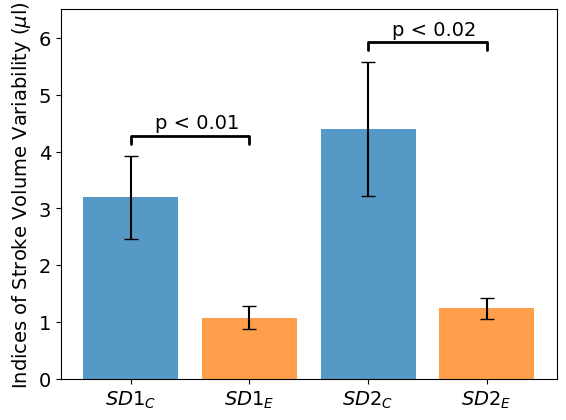

In [31]:
fig, ax = plt.subplots()
ax.bar(["$SD1_C$", "$SD1_E$", "$SD2_C$", "$SD2_E$"], means, yerr=cvs, align='center', alpha=0.75, color=("C0", "C1", "C0", "C1"), ecolor='black', capsize=5)
ax.set_ylabel('Indices of Stroke Volume Variability ($\mu$l)')
props = {'connectionstyle':'bar','arrowstyle':'-', 'shrinkA':20,'shrinkB':20,'linewidth':2}
ax.annotate("p < 0.01", xy=(.2, 4.4), zorder=10)
ax.annotate('', xy=(0,3.65), xytext=(1,3.65), arrowprops=props)
ax.annotate("p < 0.02", xy=(2.2, 6.05), zorder=10)
ax.annotate('', xy=(2,5.3), xytext=(3,5.3), arrowprops=props)
ax.set_ylim([0,6.5])

plt.savefig("../Manuscript/Fig02_D.pdf")

In [32]:
t_stat, p_value = stats.ttest_ind(Means_C, Means_E, equal_var=False)
p_value/2

7.161247613890177e-06

In [33]:
t_stat, p_value = stats.ttest_ind(SD1_C, SD1_E, equal_var=False)
p_value/2

0.008394846032957625

In [34]:
t_stat, p_value = stats.ttest_ind(SD2_C, SD2_E, equal_var=False)
p_value/2

0.01198196348463627